In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from bulletin.commom import static, normalize

pd.set_option('display.max_columns', None)

In [3]:
datetime.strptime('01/01/2020','%d/%m/%Y')

datetime.datetime(2020, 1, 1, 0, 0)

In [2]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.3%}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=90)

In [3]:
geral = pd.read_csv('INFORME_EPIDEMIOLOGICO_30_11_Geral.csv', sep=';', converters={'IDADE_ORIGINAL': lambda x: normalize.normalize_number(x,fill=0)}, parse_dates=['DATA_DIAGNOSTICO','DATA_OBITO'], date_parser=pd.to_datetime)
geral.columns = [ normalize.normalize_labels(x) for x in geral.columns ]
geral.shape[0]

280084

In [4]:
onda1 = '11 até 41'
onda2 = '43 em diante'

In [5]:
obitos = geral.loc[ geral['data_obito'].notnull() ].copy()
obitos.loc[ obitos['data_obito'] < static.se.loc[static.se['se'] == 42, 'inicio'].to_list()[0], 'se' ] = onda1
obitos.loc[ obitos['data_obito'] > static.se.loc[static.se['se'] == 42, 'fim'].to_list()[0], 'se' ] = onda2

In [6]:
geral.loc[ geral['data_diagnostico'] < static.se.loc[static.se['se'] == 42, 'inicio'].to_list()[0], 'se' ] = onda1
geral.loc[ geral['data_diagnostico'] > static.se.loc[static.se['se'] == 42, 'fim'].to_list()[0], 'se' ] = onda2

In [7]:
faixa_etaria = [10,20,30,40,50,60,70,80,90,100]
faixa_etaria_labels = ['0 a 9','10 a 19','20 a 29','30 a 39','40 a 49','50 a 59','60 a 69','70 a 79','80 a 89','90 a 99','100 ou +']
faixa_etaria_index = dict(enumerate(faixa_etaria_labels))
index_casos = np.digitize(geral['idade_original'], faixa_etaria, right=True)
index_obitos = np.digitize(obitos['idade_original'], faixa_etaria, right=True)

In [8]:
geral_se_casos = geral.groupby(by=['se',index_casos])[['casos']].count().rename(index=faixa_etaria_index)
geral_se_casos.index.names = [ 'se', 'faixa_etaria' ]

In [9]:
geral_se_obitos = obitos.groupby(by=['se',index_obitos])[['obitos']].count().rename(index=faixa_etaria_index)
geral_se_obitos.index.names = [ 'se', 'faixa_etaria' ]

In [10]:
faixa_etaria = geral_se_casos.join(geral_se_obitos).fillna(0)

In [11]:
faixa_etaria['obitos'] = faixa_etaria['obitos'].apply(int)
faixa_etaria.to_excel('faixa_etaria.xlsx')

In [12]:
onda1casos = faixa_etaria.loc[onda1,'casos'].to_numpy()
onda1casosP = onda1casos / onda1casos.sum()
onda2casos = faixa_etaria.loc[onda2,'casos'].to_numpy()
onda2casosP = onda2casos / onda2casos.sum()

In [13]:
onda1obitos = faixa_etaria.loc[onda1,'obitos'].to_numpy()
onda1obitosP = onda1obitos / onda1obitos.sum()
onda2obitos = faixa_etaria.loc[onda2,'obitos'].to_numpy()
onda2obitosP = onda2obitos / onda2obitos.sum()

In [14]:
stats.ttest_ind(onda1casos,onda2casos, equal_var = False)

Ttest_indResult(statistic=2.251390740570628, pvalue=0.04352342401727358)

In [15]:
stats.ttest_ind(onda1obitos,onda2obitos, equal_var = False)

Ttest_indResult(statistic=2.2968250904064664, pvalue=0.04226187393859226)

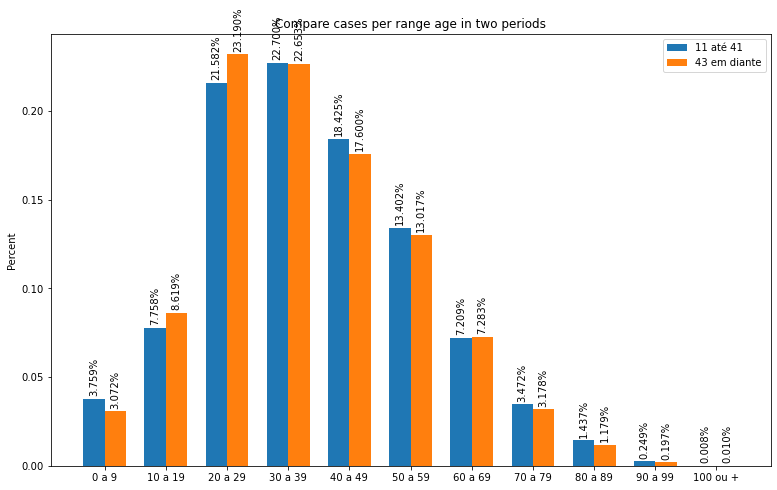

In [16]:
x = np.arange(len(faixa_etaria_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

rects1 = ax.bar(x - width/2, onda1casosP, width, label='11 até 41')
rects2 = ax.bar(x + width/2, onda2casosP, width, label='43 em diante')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Compare cases per range age in two periods')
ax.set_xticks(x)
ax.set_xticklabels(faixa_etaria_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()

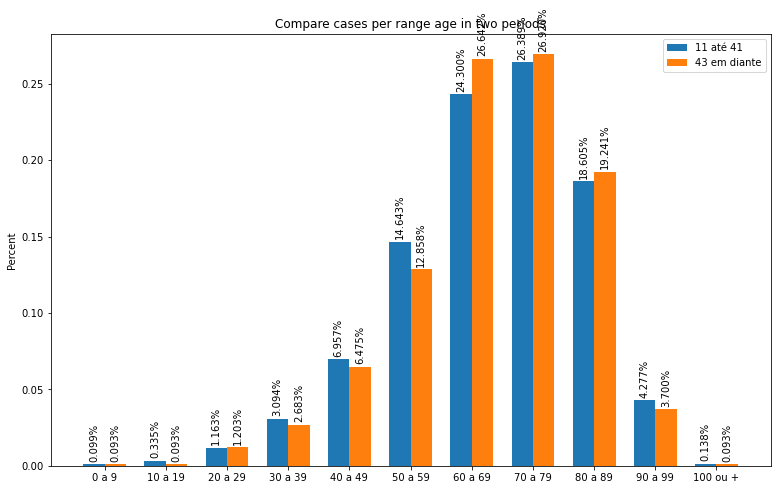

In [17]:
x = np.arange(len(faixa_etaria_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

rects1 = ax.bar(x - width/2, onda1obitosP, width, label='11 até 41')
rects2 = ax.bar(x + width/2, onda2obitosP, width, label='43 em diante')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Compare cases per range age in two periods')
ax.set_xticks(x)
ax.set_xticklabels(faixa_etaria_labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

# fig.tight_layout()

plt.show()